# MSDS 432, Assignment 3 - Recursion

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
import sys

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
sys.setrecursionlimit(5000) # increase the default max recursion depth for benchmark results.

In [5]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

## Factoral Algorithms

In [6]:
def factorial_recursive(n):
    """Recursive version of Factoral (n!)"""
    if n == 1:
        return 1
    else:
        return n * factorial_recursive(n-1)
    
def factorial_iterative(n):
    """Iterative version of Factoral (n!)"""
    result = 1
    for i in range(n, 1, -1):
        result *= i
    return result

def profile(func):
    """Utility function to help profile the runtime of code blocks."""
    start_time = time()
    func()
    return time() - start_time

## Benchmark

In [7]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['N', 'Factorial', 'Recursive', 'Iterative', 'Diff'])

In [8]:
dataset = [int(np.random.uniform(2000, 3500)) for k in range(0, 10)] # increased the numeric range due to getting all zeros.
dataset.sort() # order from largest to smallest for charting

for index in range(len(dataset)): # iterate the dataset
    n = dataset[index]
    recursive_time = profile(lambda: factorial_recursive(n)) # profile recursive version
    iterative_time = profile(lambda: factorial_iterative(n)) # profile iterative version
    
    fac_int = factorial_iterative(n)
    fac_rec = factorial_recursive(n)
    
    assert fac_int == fac_rec # ensure the two version return the same result.
    
    results.loc[index] = [n, str(fac_int), recursive_time, iterative_time, recursive_time - iterative_time] # save it.

## Results

In [9]:
results # display the results table / DataFrame

,N,Factorial,Recursive,Iterative,Diff
0,2165,1217971911917252718968109433296170266083431434...,0.002003,0.001030,9.734631e-04
1,2203,9567692329887596361031567707694096451554801004...,0.001003,0.000999,4.291534e-06
2,2868,8096766443837134633832197023508842954757414586...,0.002027,0.002002,2.503395e-05
3,2966,3001756599027096008170361392950831864888678615...,0.001972,0.001002,9.701252e-04
4,3313,6842425973416112300731944827818785181610199008...,0.003001,0.001973,1.027584e-03
5,3355,6344244510640784303976274784525880352705844621...,0.001999,0.002026,-2.622604e-05
6,3441,3105196211733875608386227989790827670004632565...,0.003000,0.002000,9.996891e-04
7,3460,5164554695657782196771494005043899606815980566...,0.001976,0.001999,-2.312660e-05
8,3463,2142959856530032656413871970119865752163155298...,0.016999,0.002000,1.499987e-02
9,3498,1952499244255623668064661326659569007076495100...,0.001999,0.001999,-4.768372e-07


## Summary

The two algorithms under comparison in this lab are for computing the factorial of a given number, n, which is defined as the product of a given integer, n, and all the integers below it, i.e., 4! = 4 * 3 * 2 * 1 = 24. There are two distinct implantations of the algorithm, a recursive version (factorial_recursive) and an iterative version (factorial_iterative).

Both algorithms have an asymptotic complexity of O(n), which is to say that the algorithms runtime grows linearly with the associated input. The factorial function itself is also a type of growth rate typically associated with permutations, or all possible variations of a given problem, and these are typically seen as not solvable in a realistic time frame.

The recursive implementation of the factorial function takes one argument, n, and multiplies the results of successive calls to the function by the initial argument value, exiting when we reach the value 1. For example, factorial_recursive(4) would expand to: 4 * factorial_recursive(3) * factorial_recursive(2) * factorial_recursive(1), yielding 24 upon completion.

The iterative implementation of the factorial function takes the same argument as the recursive version, except it keeps a local result variable and loops over it in reverse (n -> 1), decrementing by -1 each iteration, and saving the resulting computation in the local result variable. When the loop is complete it will have multiplied every integer less than itself up-to and including 1.

As we see in the chart, the output of the factorial function is excessively large, so much so that just displaying the sheer number of digits being generated in a tabular form is difficult without truncation. The runtime of the recursive version and the iterative version are summarized in the chart as N increases, the recursive implementation of the algorithm is generally slower computationally (until the next to last spike which I believe is due to poor instrumentation of the runtime due to the Python garbage collector running during the timing of the function call).

The big picture idea here and why these two algorithms in particular are useful to data engineers is that any given problem of an iterative or traversal nature can be solved both iteratively and recursively. There is an additional associated time and space complexity with the recursive version, however, the recursive version is easier to read, and the actual implementation is modeled closely to the exact problem definition.

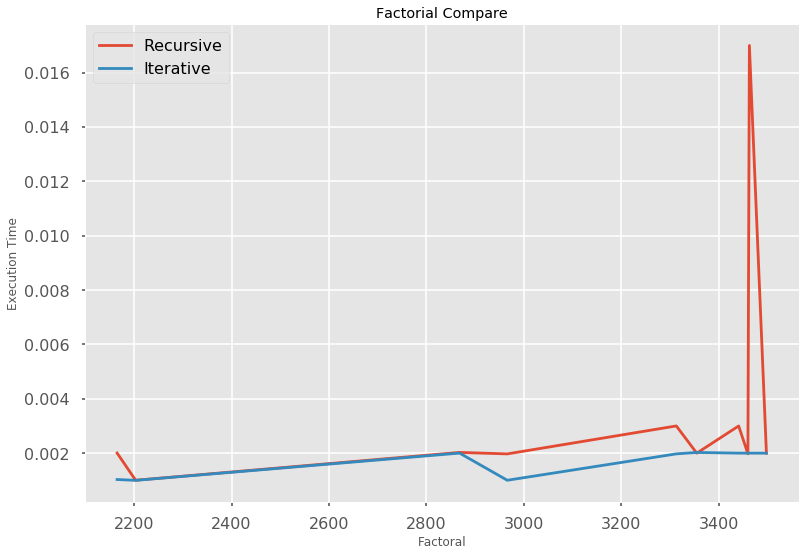

In [10]:
# Chart the relevant metrics about the three algorithms in comparision.
ax = results[['N', 'Recursive', 'Iterative']].plot.line(x='N', title='Factorial Compare')
ax.set_xlabel('Factoral')
ax.set_ylabel('Execution Time')
plt.show()